# Notebook: Graphical presentations of data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Barplots: The colors of 182 poinsettias

In [2]:
table_1 = pd.DataFrame(
    index = ['Red','Pink','White'],
    data = {'Frequency': [108, 40, 34]}
)

table_1

Frequency
Red          108
Pink          40
White         34

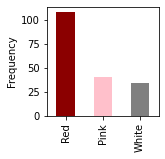

In [3]:
# Make bar plot of frequency
table_1.plot.bar(
    y='Frequency',
    color=['darkred','pink','gray'],
    figsize=(2,2),
    legend=False
)
plt.ylabel('Frequency')
plt.savefig(
    fname='poinsettias_bar_frequency.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

The scale of the bar chart is typically frequency, but it can also be recalculated to
relative frequency (i.e., the fraction of all observations between 0 and 1.0) or percent (again of all observations (0-100%). Below, the same poinsettia data is displayed using different scales. While the scale changes, the picture and thus our insights into the data do not.

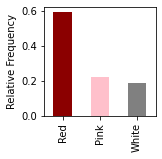

In [4]:
# Add column in dataframe (table) with "Relative Frequency"
total_number_of_meassuments = table_1['Frequency'].sum()
relative_frequency = table_1['Frequency']/total_number_of_meassuments
table_1['Relative Frequency'] = relative_frequency

# Make bar plot of relative frequency
table_1.plot.bar(
    y='Relative Frequency',
    color=['darkred','pink','gray'],
    figsize=(2,2),
    legend=False
)
plt.ylabel('Relative Frequency')
plt.savefig(
    fname='poinsettias_bar_relative.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

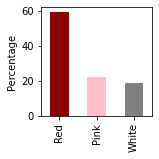

In [5]:
# Add column in dataframe (table) with "Percent"
total_number_of_meassuments = table_1['Frequency'].sum()
relative_frequency = table_1['Frequency']/total_number_of_meassuments
percent = relative_frequency*100
table_1['Percent'] = percent

# Make bar plot of percentage
table_1.plot.bar(
    y='Percent',
    color=['darkred','pink','gray'],
    figsize=(2,2),
    legend=False
)
plt.ylabel('Percentage')
plt.savefig(
    fname='poinsettias_bar_percent.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

In [6]:
# Modified table
table_1

Frequency  Relative Frequency    Percent
Red          108            0.593407  59.340659
Pink          40            0.219780  21.978022
White         34            0.186813  18.681319

The same information can be shown in a pie chart.

In [7]:
table_1.plot.pie(
    y='Frequency',
    colors=['red','pink','gray']
)

<AxesSubplot:ylabel='Frequency'>

### Counting values
With Pandas, a Series can be created by counting values using the `value_counts()` method.

In [8]:
# Generate DataFrame with list of ten colors (for demonstration)
df_with_colors = pd.DataFrame({
    "Color": ['Red', 'Pink', 'Red', 'White', 'Pink', 
              'Red', 'Pink', 'Red', 'White', 'Red']
})
df_with_colors

Color
0    Red
1   Pink
2    Red
3  White
4   Pink
5    Red
6   Pink
7    Red
8  White
9    Red

In [9]:
# Count values in column (i.e. a Pandas Series)
series_color_counts = df_with_colors['Color'].value_counts()

# Make DataFrame of color counts
df_color_counts = pd.DataFrame({'Colors': series_color_counts})
df_color_counts

Colors
Red         5
Pink        3
White       2

## Dotplot: Infant mortality

In [10]:
# Create DataFrame of infant mortalities
# by concatenation of two parts (for clarity)
part_1 = pd.DataFrame(
    index = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Columbia', 'Ecuador'],
    data = {'Infant mortality rate': [11.4, 44.7, 22.6, 7.7, 18.9, 20.9]}
)
part_2 = pd.DataFrame(
    index = ['Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
    data = {'Infant mortality rate': [ 30.0, 24.7, 28.6, 18.8, 11.3, 26.5]}
)
table_2 = pd.concat([part_1, part_2])
table_2

Infant mortality rate
Argentina                   11.4
Bolivia                     44.7
Brazil                      22.6
Chile                        7.7
Columbia                    18.9
Ecuador                     20.9
Guyana                      30.0
Paraguay                    24.7
Peru                        28.6
Suriname                    18.8
Uruguay                     11.3
Venezuela                   26.5

The dotplot is unfortunalty not build into the Pandas module. However, it can be created using the `plot()` method of the matplotlib module (imported as `plt`).

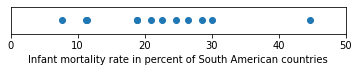

In [11]:
# Extract series (column) from table
series = table_2['Infant mortality rate']

# Make dotplot of series
plt.figure(figsize=[6, 0.5])  # New elongated figure.
list_of_ones = [1]*len(series)  # A list of ones used for y-values.
plt.plot(series, list_of_ones, 'o')  # Plot values agains a list of ones.
plt.yticks([])  # Remove ticks on y-axis.
plt.xlim(0,50)
plt.xlabel('Infant mortality rate in percent of South American countries')
plt.savefig(
    fname='infant_mortality_dot_plot.png',
    dpi=300,
    bbox_inches='tight'
)

In the case where there may be more than one observation for each value, the dots can be stacked
on top of each other to form a column. The data examined below, on piglet survival, is discrete. Here, the
concentration of data observations is indicated by the hight of the column. Such bar charts based on data range intervals are referred to as **histograms** (data intervals of 1).

In [12]:
table_3 = pd.DataFrame(
    {'Number of surviving piglets': range(5,15),
     'Frequency': [1, 0, 2, 3, 3, 9, 8, 5, 3, 2]}
).set_index('Number of surviving piglets')
table_3

Frequency
Number of surviving piglets           
5                                    1
6                                    0
7                                    2
8                                    3
9                                    3
10                                   9
11                                   8
12                                   5
13                                   3
14                                   2

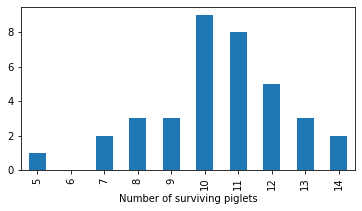

In [13]:
table_3.plot.bar(
    figsize=(6,3),
    legend=False
)
plt.savefig(
    fname='surviving_piglets.png',
    dpi=300,
    bbox_inches='tight'
)

## Heights

In [14]:
# Data from: http://www.math.yorku.ca/people/georges/Files/NATS1500/Data/ds/UCDavis2.txt
students = pd.read_csv('UCDavis2.csv')
students.head()

Unnamed: 0     Sex    GPA Seat Alchol   WtFeel  Height IdealHt momheight  \
0           0  Female  2.600    M     15  AboutRt    64.0   66.00      64.0   
1           1    Male  2.700    M     14  AboutRt    69.0   76.00      67.0   
2           2  Female  3.000    F      *  AboutRt    66.0   68.00      61.0   
3           3  Female  3.110    F     10  AboutRt    63.0   65.00      62.0   
4           4    Male  3.400    B     30   OverWt    72.0   74.00      66.0   

  dadheight   Hand Looks   Friends Cheat Smoke  
0      70.0  Right    15  Opposite    No    No  
1      68.0   Left    13      Same    No    No  
2      70.0  Right    10  Opposite    No   Yes  
3      68.0  Right    12      Same    No    No  
4      69.0  Right    14      Same    No    No

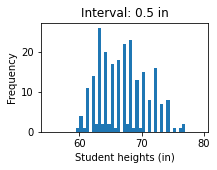

In [15]:
interval = 0.5
students.plot.hist(
    y='Height',
    bins=np.arange(55, 80, interval),
    figsize=(3, 2),
    legend=False
)
plt.xlabel('Student heights (in)')
plt.title(f'Interval: {interval} in')
plt.savefig(
    fname='student_heights_bin_width_05.png',
    dpi=300,
    bbox_inches='tight')
plt.show()

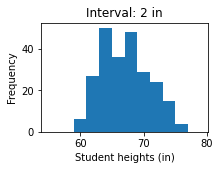

In [16]:
interval = 2
students.plot.hist(
    y='Height',
    bins=np.arange(55, 80, interval),
    figsize=(3, 2),
    legend=False
)
plt.xlabel('Student heights (in)')
plt.title(f'Interval: {interval} in')
plt.savefig(
    fname='student_heights_bin_width_2.png',
    dpi=300,
    bbox_inches='tight')
plt.show()

In [17]:
interval = 5
students.plot.hist(
    y='Height',
    bins=np.arange(55, 80, interval),
    figsize=(3, 2),
    legend=False
)
plt.xlabel('Student heights (in)')
plt.title(f'Interval: {interval} in')
plt.savefig(
    fname='student_heights_bin_width_5.png',
    dpi=300,
    bbox_inches='tight')
plt.show()


## Titanic
The figures below investigate the same data of the age of pasangers on the Titanic.
The data set is plotted in histograms using different data intervals as indicated. 

In the upper histogram the intervals are large and much of the detail is lost (grouped into kids, adults, and seniors).
In lower histogram the intervals are small, so the data is not
presented in a summarized or smooth pattern; too many intervals have too few
data. There is no correct choice, however, and it is up to you decide
which intervals give you the best picture of the data distribution.

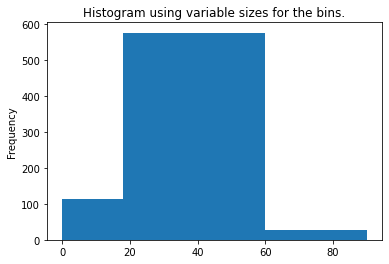

In [18]:
titanic = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv')

plt.figure()
plt.title(f'Histogram using variable sizes for the bins.')
titanic['Age'].plot.hist(bins=[0,18,60,90])
plt.show()

plt.figure()
start, stop, step = 0, 90, 5
titanic['Age'].plot.hist(bins=range(start, stop, step))
plt.title(f'Histogram with bin width of {step}.')
plt.show()

plt.figure()
start, stop, step = 0, 90, 1
titanic['Age'].plot.hist(bins=range(start, stop, step))
plt.title(f'Histogram with bin width of {step}.')
plt.show()

## Shapes of distributions
Below we use the NumPy module to simulated data and show examples of distributions.

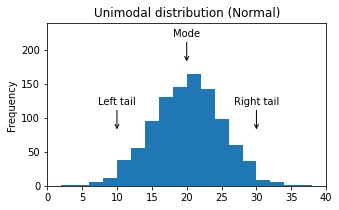

In [19]:
# Simulate and plot data of a unimodal distribution
from numpy.random import normal  # import  of 
simulated_data = np.random.normal(  # Drawing from a normal distribution
    loc=20.0,
    scale=5.0,
    size=1000
)
df = pd.DataFrame({'Simulated data': simulated_data})

df.plot.hist(  # Histogram of simulated data
    bins=range(0, 40, 2),
    figsize=(5, 3),
    legend=False
)
plt.title('Unimodal distribution (Normal)')
plt.ylim(0, 240)
plt.xlim(0, 40)
plt.annotate(  # Show location of the mode
    'Mode',
    xy=(20, 180), 
    xytext=(20, 220),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
plt.annotate(  # Show location of the left tail
    'Right tail',
    xy=(30, 80), 
    xytext=(30, 120),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
plt.annotate(  # Show location of the right tail
    'Left tail',
    xy=(10, 80), 
    xytext=(10, 120),
    ha='center',
    arrowprops = {'arrowstyle': '->'}
)
plt.savefig(
    fname='unimodal_distribution.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

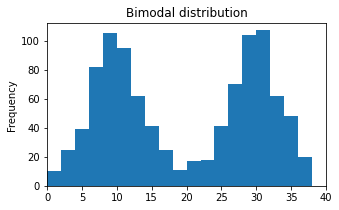

In [20]:
# Simulate and plot data of a unimodal distribution
from numpy.random import normal  # import normal distribution of random floating point numbers
simulated_data = list(normal(loc=10.0, scale=4.0, size=500))
simulated_data += list(normal(loc=30.0, scale=4.0, size=500))
df = pd.DataFrame({'Simulated data': simulated_data})
df.plot.hist(  # Histogram of simulated data
    bins=range(0,40,2),
    figsize=(5, 3),
    legend=False
)
plt.title('Bimodal distribution')
plt.xlim(0,40)
plt.savefig(
    fname='bimodal_distribution.png',
    dpi=300,
    bbox_inches='tight'
)
plt.show()

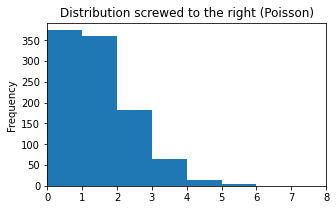

In [21]:
from numpy import random, arange  # import normal distribution of random integers
simulated_data = random.poisson(lam = 1.0, size=1000)
df = pd.DataFrame({'Simulated data': simulated_data})
df.plot.hist(  # Plot histogram of simulated data
    bins=range(0,8,1),
    figsize=(5, 3),
    legend=False
)
plt.title('Distribution screwed to the right (Poisson)')
plt.xlim(0,8)
plt.savefig(
    fname='screwed_distribution.png',
    dpi=300,
    bbox_inches='tight'
)

## Relational graphs

In [22]:
# Frequency table of E. coli source by location
table_4 = pd.DataFrame(
    index = ['Chorro Creek', 'Los Osos Creek', 'Baywood'],
    data = {
        'Bird': [46, 79, 35],
        'Dimestic pet': [29, 56, 23],
        'Farm animal': [106, 32, 0],
        'Human': [38, 63, 60],
        'Terrestial mammal': [22, 26, 8]
    }
)
table_4

Bird  Dimestic pet  Farm animal  Human  Terrestial mammal
Chorro Creek      46            29          106     38                 22
Los Osos Creek    79            56           32     63                 26
Baywood           35            23            0     60                  8

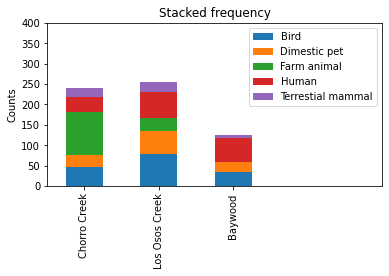

In [23]:
table_4.plot.bar(
    stacked=True,
    figsize=(6, 3),
    title = 'Stacked frequency'
)
plt.ylim(0,400)
plt.xlim(-0.5,4)
plt.ylabel('Counts')

plt.savefig(
    fname='Ecoli_stacked.png',
    dpi=300,
    bbox_inches='tight'
)

Alternatively, one of the variables (E. coli in this case) can be expressed as a percentage which then can be shown in a stacked relative frequency or bar chart. These types of graphs are good for showing whether the distributions of observations (counts or frequencies) are similar or different as a function of the other categorical
variable.

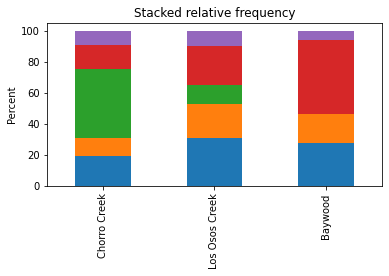

Bird  Dimestic pet  Farm animal      Human  \
Chorro Creek    19.087137     12.033195    43.983402  15.767635   
Los Osos Creek  30.859375     21.875000    12.500000  24.609375   
Baywood         27.777778     18.253968     0.000000  47.619048   

                Terrestial mammal  
Chorro Creek             9.128631  
Los Osos Creek          10.156250  
Baywood                  6.349206

In [24]:
sums = table_4.sum('columns')  # Compute sums
table_4_relative = table_4.divide(sums, axis='rows')  # Devide by the sums to get relative value
table_4_percent = table_4_relative*100  # Multiply all values by 100 to get value in percentages

# Make (stacked) bar plot
table_4_percent.plot.bar(
    stacked=True,
    figsize=(6, 3),
    legend=False,
    title = 'Stacked relative frequency'
)
plt.ylabel('Percent')

plt.savefig(
    fname='Ecoli_stacked_percent.png',
    dpi=300,
    bbox_inches='tight'
)

plt.show()

table_4_percent

If you have a numerical variable that you want to compare to a categorical variable, then one possibility is a **side-by-side dot plot**. As you learned above, the dot plot is a graphical way to
plot the location and distribution of numerical variables. Below is a side-
by-side dot plot of the ATP concentration in birch tree roots in a flooded area and for a control group (of the same size).

In [25]:
def side_by_side_dot_plot(df):
    ''' Side-by-side dot plot of a Pandas dataframe, df '''
    from numpy import ones
    from matplotlib.pyplot import xticks, xlim
    for idx, (label, series) in enumerate(df.iteritems()):
        plt.plot(ones(len(series))*idx, series, 'o')
    xticks(range(df.ndim),df.columns)
    xlim(-0.5,len(df.columns)-0.5)

Text(0, 0.5, 'ATP concentration in birch tree roots')

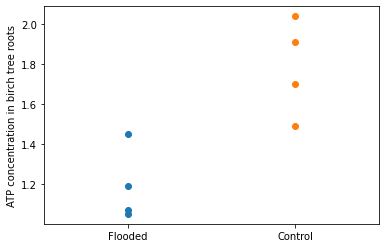

In [26]:
# ATP concentration in birch tree roots
df = pd.DataFrame({
    'Flooded': [1.45, 1.19, 1.05, 1.07],
    'Control': [1.70, 2.04, 1.49, 1.91]
})
side_by_side_dot_plot(df)
plt.ylabel('ATP concentration in birch tree roots')

## Brain weights

   index   man  female
0    1.0  1607  1125.0
1    2.0  1157  1027.0
2    3.0  1248  1112.0
3    4.0  1310   983.0
4    5.0  1398  1090.0


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning

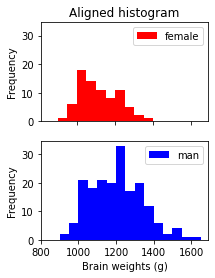

In [27]:
df = pd.read_csv('brain.csv')
print(df.head())

plt.figure(figsize=(3,4))  # Create 3x4 in figure 
plt.subplot(211)  # Create the upper panel (female)
plt.title('Aligned histogram')
df.plot.hist(
    y=['female'],
    color = 'red',
    bins=range(850,1700,50),
    ax=plt.gca()
)
plt.subplot(
    212,  # Create the lower panel (man)
    sharex = plt.gca(),  # Ensure that x and y
    sharey = plt.gca()   #  are shared
)
df.plot.hist(
    y=['man'],
    color = 'blue',
    bins=range(850,1700,50),
    ax=plt.gca()
)
plt.xticks(range(800,1800,200))  # Set x-ticks with spacing of 200
plt.xlabel('Brain weights (g)')

plt.savefig(  # Save figure to disk
    fname='brain_side_by_side.pdf',
    bbox_inches='tight'
)

plt.show()

In [28]:
df.plot.hist(
    title='Stacked histogram',
    figsize=(4,3),
    y=['female','man'],
    color = ['red','blue'],
    bins=range(850,1700,50),
    stacked = True
)
plt.xticks(range(800,1800,200))  # Set x-ticks with spacing of 200
plt.xlabel('Brain weights (g)')

plt.savefig(  # Save figure to disk
    fname='brain_stacked.pdf',
    bbox_inches='tight'
)

plt.show()

## Whale

In [29]:
table_5 = pd.DataFrame({
    'Liver Se': [6.23,  6.79,  7.92,  8.02,  9.34,
                 10.00, 10.57, 11.04, 12.36, 14.53,
                 15.28, 18.68, 22.08, 27.55, 32.83,
                 36.04, 37.74, 40.00, 41.23, 45.47],
    'Tooth Se': [140.16, 133.32, 135.34, 127.82, 108.67,
                146.22, 131.18, 145.51, 163.24, 136.55,
                112.63, 245.07, 140.48, 177.93, 160.73,
                227.60, 177.69, 174.23, 206.30, 141.31]
})
table_5.head()

Liver Se  Tooth Se
0      6.23    140.16
1      6.79    133.32
2      7.92    135.34
3      8.02    127.82
4      9.34    108.67

In [30]:
table_5.plot.hist(
    subplots=True,
    bins=20
)

/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

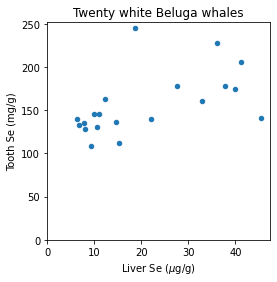

In [31]:
table_5.plot.scatter(
    x='Liver Se', 
    y='Tooth Se',
    figsize=(4, 4)
)
plt.title('Twenty white Beluga whales')
plt.xlabel('Liver Se ($\mu$g/g)')
plt.ylabel('Tooth Se (mg/g)')
plt.xlim(0, None)
plt.ylim(0, None)
plt.savefig(
    fname='whale_scatter_plot.png',
    dpi=300,
    bbox_inches='tight'
)

## Exercises

### How to make a dot plot

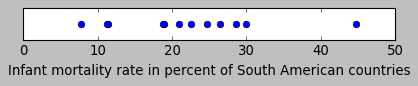

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('classic')

# Define series
series = pd.Series(
    name = 'Infant mortality rate',
    data = [11.4, 44.7, 22.6, 7.7, 18.9, 20.9,
            30.0, 24.7, 28.6, 18.8, 11.3, 26.5]
)

# Make dotplot
plt.figure(figsize=[6, 0.5])  # New elongated figure.
plt.plot( # Plot values agains zero.
    series,    # values on x-axis
    series*0,  # values on y-axis
    'o'  # Make dots
)  
plt.yticks([])  # Remove ticks on y-axis.
plt.xlim(0, 50)  # Set limits
plt.xlabel('Infant mortality rate in percent of South American countries')
plt.show()

### Present data from researchers of the Life Sciences

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('classic')

# Create Pandas data Series. Description:
#   Agronomists measured the yield of a variety 
#   of hybrid corn in 16 locations in Illinois.
#   The data, in bushels per acre, were
series = pd.Series(
    data = [
        241, 230, 207, 219, 266, 167,
        204, 144, 178, 158, 153,
        187, 181, 196, 149, 183,
    ]
)

# Plot histogram using bins
#   from 150 to 300 with a width of 20
series.plot.hist(
    bins=np.arange(150,300,20)
)
plt.xlabel('Yield of hybrid corn (bushels per acre)')
plt.show()

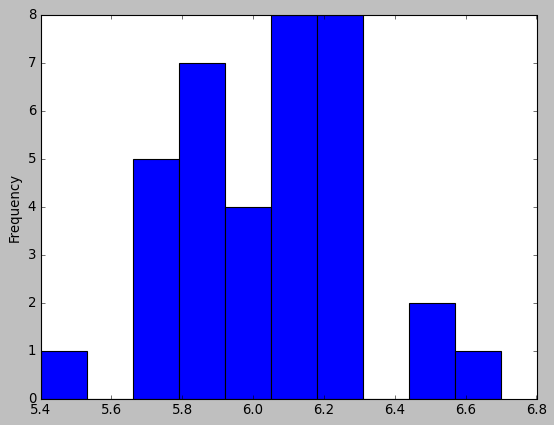

In [34]:
import pandas as pd

molar = pd.Series(
    name = 'molar',
    data = [
        6.1, 5.7, 6.0, 6.5, 6.0, 5.7,
        6.1, 5.8, 5.9, 6.1, 6.2, 6.0,
        6.3, 6.2, 6.1, 6.2, 6.0, 5.7,
        6.2, 5.8, 5.7, 6.3, 6.2, 5.7,
        6.2, 6.1, 5.9, 6.5, 5.4, 6.7,
        5.9, 6.1, 5.9, 5.9, 6.1, 6.1, 
    ]
)
molar.plot.hist()
molar.to_csv('molar.csv', header=False, index=False)

<AxesSubplot:ylabel='Frequency'>

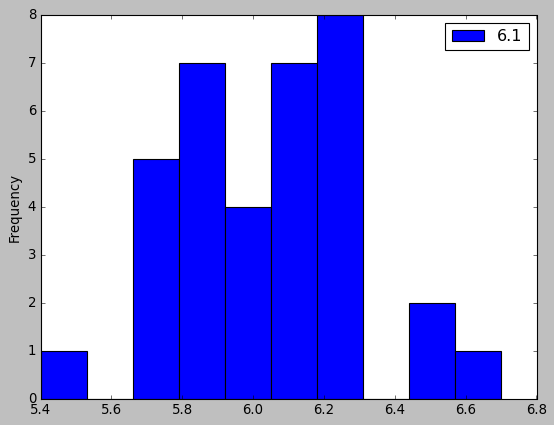

In [35]:
df = pd.read_csv('molar.csv')
df.plot.hist()